In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
path = 'models/linear_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 172 ms
Wall time: 398 ms


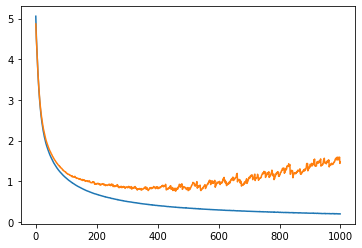

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [6]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 860us/step


<h3>Components from PCA</h3>

In [17]:
pca.n_components_

20

<h3>Classification Report</h3>

In [7]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.75000   1.00000   0.85714        21
           1    1.00000   0.88889   0.94118        18
           2    1.00000   0.95652   0.97778        23
           3    1.00000   1.00000   1.00000        20
           4    1.00000   1.00000   1.00000        23
           5    0.64706   0.55000   0.59459        20
           6    1.00000   0.95652   0.97778        23
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        25
           9    1.00000   1.00000   1.00000        13
          10    0.43396   1.00000   0.60526        23
          11    1.00000   0.94118   0.96970        17
          12    1.00000   0.81250   0.89655        16
          13    0.96875   1.00000   0.98413        31
          14    1.00000   1.00000   1.00000        30
          15    1.00000   1.00000   1.00000        19
          16    1.00000   1.00000   1.00000        25
          17    1.00000   1

<h1>Exponential Damage</h1>

In [8]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [10]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
%%time
path = 'models/exp_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 156 ms
Wall time: 271 ms


In [12]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 901us/step


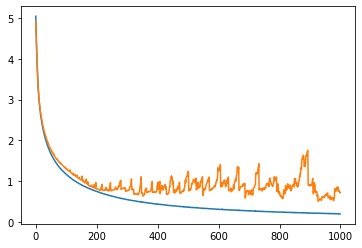

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Components from PCA</h3>

In [26]:
pca.n_components_

19

<h3>Classification Report</h3>

In [13]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.84000   1.00000   0.91304        21
           1    1.00000   0.88889   0.94118        18
           2    1.00000   0.95652   0.97778        23
           3    1.00000   1.00000   1.00000        20
           4    1.00000   1.00000   1.00000        23
           5    0.42553   1.00000   0.59701        20
           6    1.00000   0.95652   0.97778        23
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        25
           9    1.00000   1.00000   1.00000        13
          10    0.75000   0.39130   0.51429        23
          11    1.00000   0.94118   0.96970        17
          12    1.00000   0.81250   0.89655        16
          13    0.93939   1.00000   0.96875        31
          14    1.00000   1.00000   1.00000        30
          15    1.00000   1.00000   1.00000        19
          16    1.00000   1.00000   1.00000        25
          17    0.94444   1

<h1>Sigmoid-like Damage</h1>

In [14]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [16]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
%%time
path = 'models/sig_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 172 ms
Wall time: 268 ms


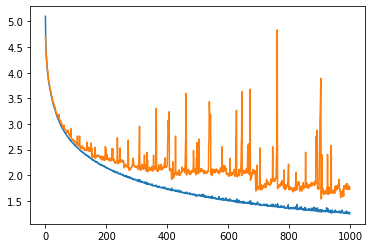

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
pred = model.predict(X_test)

<h3>Components from PCA</h3>

In [39]:
pca.n_components_

14

<h3>Classification Report</h3>

In [18]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.84000   1.00000   0.91304        21
           1    1.00000   0.88889   0.94118        18
           2    1.00000   0.95652   0.97778        23
           3    1.00000   1.00000   1.00000        20
           4    1.00000   1.00000   1.00000        23
           5    0.42553   1.00000   0.59701        20
           6    1.00000   0.95652   0.97778        23
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        25
           9    1.00000   1.00000   1.00000        13
          10    0.75000   0.39130   0.51429        23
          11    1.00000   0.94118   0.96970        17
          12    1.00000   0.81250   0.89655        16
          13    0.93939   1.00000   0.96875        31
          14    1.00000   1.00000   1.00000        30
          15    1.00000   1.00000   1.00000        19
          16    1.00000   1.00000   1.00000        25
          17    0.94444   1